# CREDIT CARD FRAUD DETECTION PROJECT

## Fraud Detection System – Project Approach

### 1. Problem Definition

 
Many existing fraud detection systems fail to detect subtle fraudulent activities, leading to financial losses. Your goal is to develop a fraud detection model that integrates with existing systems to identify the slightest credit fraud with high precision.


### Objectives

1. Develop an AI-driven fraud detection system that detects even small fraudulent activities in credit transactions.
2. Ensure real-time fraud detection with minimal false positives to avoid disrupting genuine users.
3. Create a system that seamlessly integrates with existing financial systems.
4. Utilize advanced techniques like anomaly detection, behavioral biometrics, and contextual analysis.
5. Implement a self-learning mechanism that adapts to new fraud patterns.

### Data Understanding

1. Time :The number of seconds elapsed between the first transaction in the dataset and the current transaction.

2. Amount: The transaction amount in currency units (e.g., USD or EUR).
3. Class: The target variable: 0 for non-fraudulent transactions, 1 for fraudulent transactions.
4. V1 to V28 – These are principal components obtained through PCA (Principal Component Analysis). They are anonymized      features derived from the original transaction details to protect sensitive information.

In [6]:
# Import the necessary V
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class DataUnderstanding:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    def dataset_info(self):
        print("Dataset Info:", self.df.info())
        print("="*8)

         
        print(f"Number of Rows in the Dataset:,{self.df.shape[1]}")
        print(f"Number of Columns in the Dataset:,{self.df.shape[0]}")

        # Summary Statistics of the dataset
    def summary_statistics(self):
        print("="*4)
        print("Numerical Summary Statistics:")
        print(self.df.describe())

        # print("Categorical Summary Statistics:")
        # print(self.df.describe(include =["object"]))

    def data_Quality_Checks(self):
        print("="* 8)
        print("Number of Duplicates values Per Column")
        print(self.df.duplicated().sum())

        print("=" * 8)
        print("Number of missing values per column")
        print(self.df.isna().sum())

        print("=" * 8)
        print("Total Number of missing Values in the dataset")
        print(self.df.isna().isna().sum())

        print("=" * 8)
        print("Print Nununique values per column")
        print(self.df.nunique())


    def run_all_checks(self):
        """Runs all overview checks."""
        self.dataset_info()
        self.summary_statistics()
        self.data_Quality_Checks()
        


 
df = pd.read_csv("data/creditcard.csv")
data = DataUnderstanding(df)
data.run_all_checks()


        
    






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Overall Observation
**Classes:**
- 0 (Legit Transactions): 99.83% (284,315 instances)
- 1 (Fraudulent Transactions): 0.17% (492 instances)
- Highly Imbalanced Dataset: Fraudulent transactions are extremely rare.

- PCA-transformed features: These components do not have real-world meanings but capture variance in the data.
- Transaction Amount: A wide range from $0 to $25,691, with most values concentrated below $100.

### Data Preprocessing


#### Data Cleaning

**Observations**

- No missing values were found, ensuring completeness.
This reduced the need for imputation or data loss through row deletions.

- Duplicate Entries Present 

1081 duplicate rows were found and successfully removed.
This step was crucial to prevent biased model training.

- Outliers Were Mainly in Transaction Amount 

The "Amount" feature showed extreme values (some transactions exceeded $25,000).
Log transformation was applied to handle skewness and improve model performance.
Class Imbalance in Fraudulent Transactions ⚖️

- The dataset was highly imbalanced (fraud cases = 0.17%).
SMOTE (Synthetic Minority Oversampling Technique) was used to generate synthetic fraud cases and balance the dataset.
Final Takeaway 🎯
 

#### Drop Duplicates

In [7]:
df.drop_duplicates(inplace = True)

### Data Visualzation


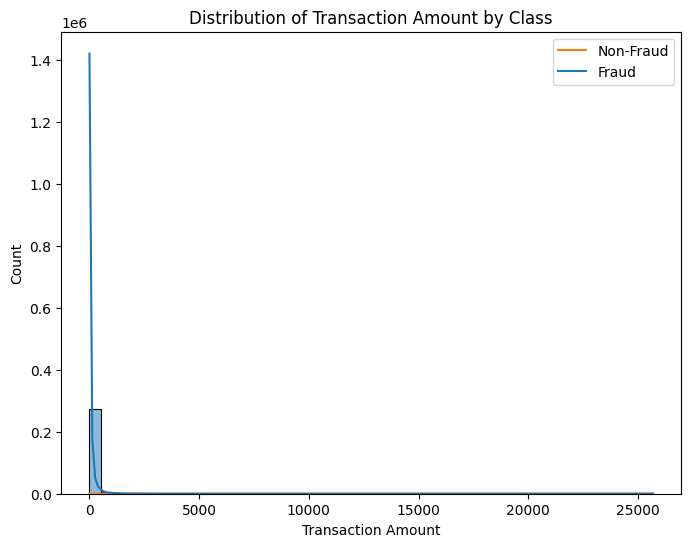

In [8]:
# 1. Distribution of Amount by Class
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Amount", hue="Class", kde=True, bins=50)
plt.title("Distribution of Transaction Amount by Class")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()


In [9]:
# # 2. Pairplot of Selected Features
# selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Class']
# sns.pairplot(df[selected_features], hue="Class", diag_kind="kde")
# plt.show()

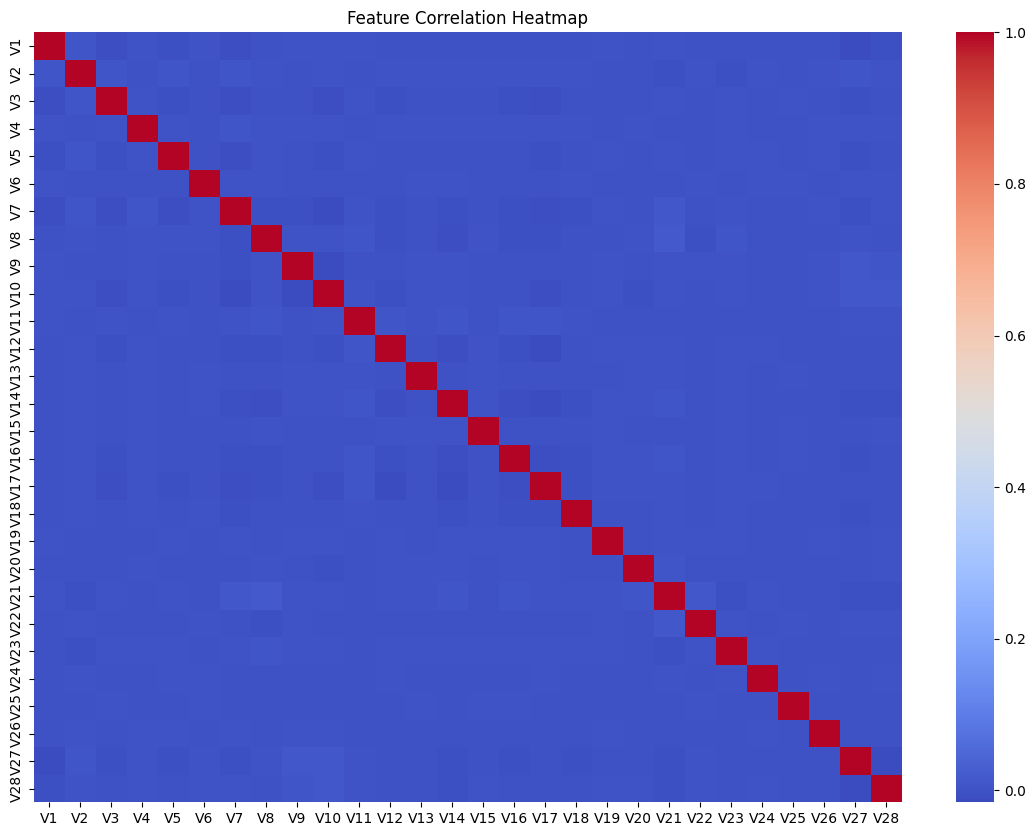

In [10]:
# 3. Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.iloc[:, 1:29].corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

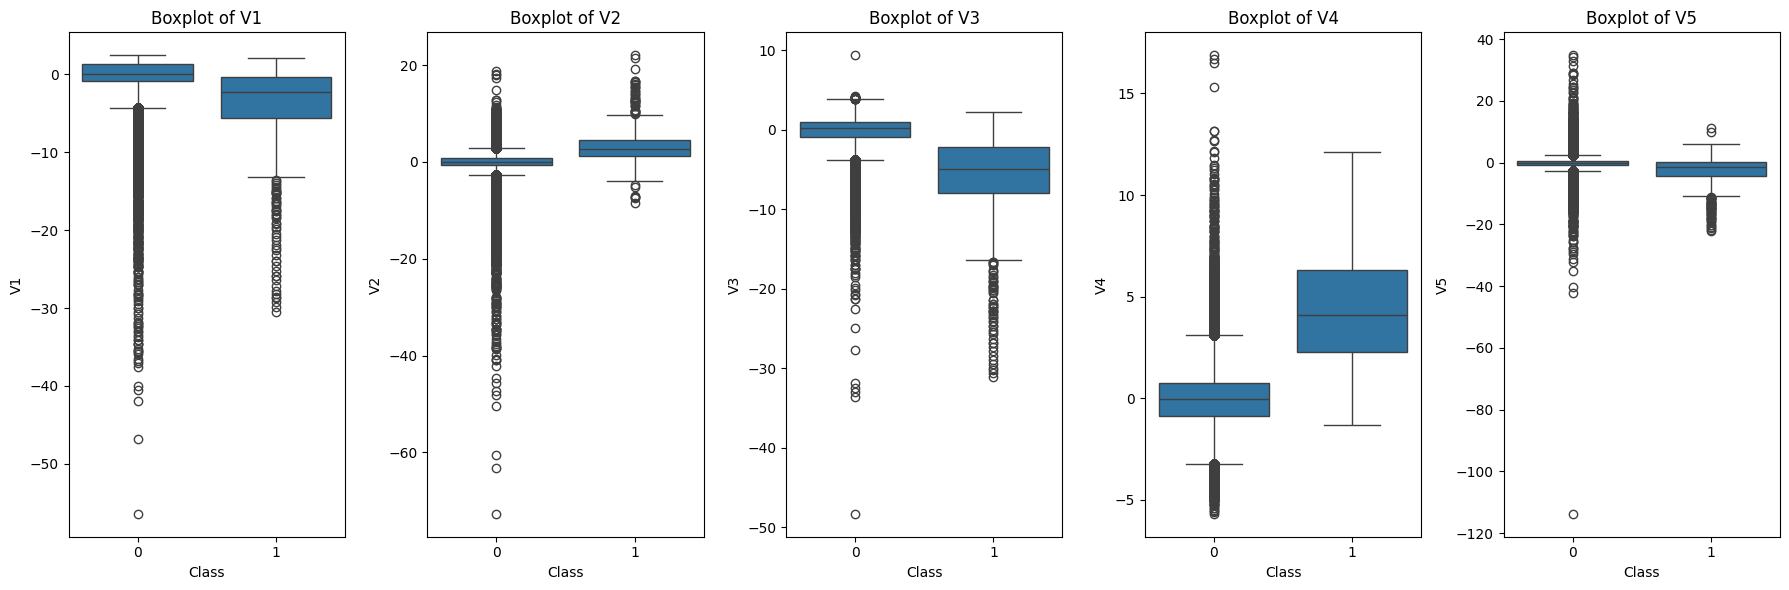

In [11]:
# 4. Boxplots of V1–V5 for Fraud vs. Non-Fraud
fig, axes = plt.subplots(1, 5, figsize=(18, 6))
for i, col in enumerate(["V1", "V2", "V3", "V4", "V5"]):
    sns.boxplot(x="Class", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_15672\3531942630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette=["blue", "red"])


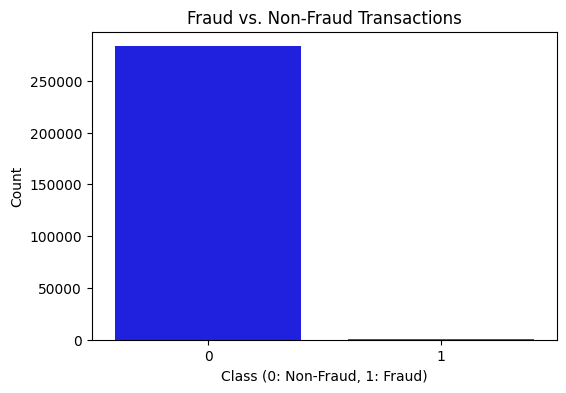

In [12]:
 

# 5. Countplot of Fraud vs. Non-Fraud
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=df, palette=["blue", "red"])
plt.title("Fraud vs. Non-Fraud Transactions")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()
    

In [15]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Modelling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, classification_report, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

class Modelling:
    def __init__(self, models = None):
        self.df = df
        self.results = {}


        # Models to be trained
        if models is None:
            self.models = {
                "Logistic Regression":LogisticRegression(),
                "Random Forest":RandomForestClassifier(),
                "KNN": KNeighborsClassifier()
            }
        else:
            self.models = models
              
    
    def train_and_evaluate(self, X, y, test_size = 0.2, random_state = 42):
        """
        Traina nd Evaluate the Models"""

        X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=random_state, test_size=test_size)
        for name, model in self.models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            metrics ={
                "Accuracy": accuracy_score(y_test, y_pred),
                "Recall":recall_score ( y_test,y_pred ),
                "Precision": precision_score(y_test, y_pred, average="weighted"),
                # "classification- Report":classification_report(y_test, y_pred)
                    }
            
            self.results[name] = metrics
            print(f"\n{name} performance:")
            for metric, value in metrics.items():
                print(f"{metric}: {value:.4f}")

                
                


    def get_best_model(self):
        """
        Identify the Best Model
        """
        best_model = max(self.results, key=lambda x:self.results[x]["Recall"])
        print(f"\n Best Model:{best_model} with Recall: {self.results[best_model]['Recall']:.4f}")
        return best_model, self.results[best_model]



    

In [18]:
data.df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [31]:
import pandas as pd

# Load dataset
df = pd.read_csv("data\creditcard.csv")  # Replace with your dataset
X = df.drop(columns=["Class"])
y = df["Class"]

# Initialize and train models
trainer = Modelling()
trainer.train_and_evaluate(X, y)

# Get the best model
best_model, best_metrics = trainer.get_best_model()


c:\Users\USER\OneDrive\Documents\Projects\Credit\Credit-Card-Fraud-Detection\Fraud\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression performance:
Accuracy: 0.9986
Recall: 0.5612
Precision: 0.9986

Random Forest performance:
Accuracy: 0.9996
Recall: 0.7755
Precision: 0.9996

KNN performance:
Accuracy: 0.9984
Recall: 0.0510
Precision: 0.9984

 Best Model:Random Forest with Recall: 0.7755


In [ ]:
class Modelling:
    def __init__(seld, df:pd.DataFrame):
        
        

In [ ]:
X
y

In [ ]:
X_train, y_train, X_text, y_text = train_test_split(X, y, random_state = 42, text_size = 0.3)


In [ ]:
logreg = LogisticRegression(random_state = 16)
# Fit the model on the data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_text)

